### Import

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

### Membaca file CSV

In [46]:
df = pd.read_csv(r'C:/01_Kuliah/01J_Lainnya/CSV/heart_disease_uci.csv')

### Menampilkan 5 baris pertama dan terakhir

In [47]:
print("5 Baris Pertama:")
display(df.head())

print("\n5 Baris Terakhir:")
display(df.tail())

5 Baris Pertama:


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0



5 Baris Terakhir:


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0
919,920,62,Male,VA Long Beach,atypical angina,120.0,254.0,False,lv hypertrophy,93.0,True,0.0,NaN,NaN,NaN,1


### Menampilkan informasi
- Tipe data
- Jumlah entri
- Jumlah kolom

In [48]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB
None


### Mengecek nilai yang hilang

In [49]:
print('Nilai yang hilang')
missing_values = df.isnull().sum()
print(missing_values)

Nilai yang hilang
id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


### Mendeteksi outlier

In [50]:

numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

for col in numeric_cols:

    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    if not outliers.empty:
        print(f"Outlier terdeteksi pada kolom '{col}':")
        print(outliers[[col]])
    else:
        print(f"Tidak ada outlier yang terdeteksi pada kolom '{col}'.")

Tidak ada outlier yang terdeteksi pada kolom 'id'.
Tidak ada outlier yang terdeteksi pada kolom 'age'.
Outlier terdeteksi pada kolom 'trestbps':
     trestbps
14      172.0
83      180.0
126     200.0
172     174.0
183     178.0
188     192.0
201     180.0
213     178.0
231     180.0
338     190.0
375     180.0
387     180.0
475     180.0
484     180.0
548     200.0
569     180.0
595     180.0
644      80.0
647     180.0
680     200.0
700     185.0
701     200.0
727     180.0
753       0.0
779     178.0
854     172.0
889     180.0
896     190.0
Outlier terdeteksi pada kolom 'chol':
      chol
48   417.0
152  564.0
181  409.0
373  412.0
434  468.0
..     ...
818    0.0
819    0.0
822    0.0
839    0.0
840    0.0

[183 rows x 1 columns]
Outlier terdeteksi pada kolom 'thalch':
     thalch
631    60.0
677    63.0
Outlier terdeteksi pada kolom 'oldpeak':
     oldpeak
91       6.2
121      4.0
123      5.6
126      4.0
183      4.2
191      4.2
211      3.8
285      4.4
293      4.0
567     

### Menghitung dan menampilkan:
- Mean
- Median
- Modus
- Standar deviasi
- Variansi
- Skewness
- Kurtosis

In [51]:
numeric_columns = df.select_dtypes(include='number')

mean = numeric_columns.mean()
median = numeric_columns.median()
mode = numeric_columns.mode().iloc[0]
std_dev = numeric_columns.std()
variance = numeric_columns.var()
skewness = numeric_columns.skew()
kurtosis = numeric_columns.kurtosis()

statistik_deskriptif = pd.DataFrame({
    'Mean': mean,
    'Median': median,
    'Modus': mode,
    'Standar deviasi': std_dev,
    'Variansi': variance,
    'Skewness': skewness,
    'Kurtosis': kurtosis
})

display(statistik_deskriptif)


,Mean,Median,Modus,Standar deviasi,Variansi,Skewness,Kurtosis
id,460.500000,460.5,1.0,265.725422,70610.000000,0.000000,-1.200000
age,53.510870,54.0,54.0,9.424685,88.824691,-0.195994,-0.382930
trestbps,132.132404,130.0,120.0,19.066070,363.515007,0.213334,2.958664
chol,199.130337,223.0,0.0,110.780810,12272.387943,-0.613836,0.062273
thalch,137.545665,140.0,150.0,25.926276,672.171813,-0.211119,-0.479725
oldpeak,0.878788,0.5,0.0,1.091226,1.190775,1.041427,1.127069
ca,0.676375,0.0,0.0,0.935653,0.875447,1.165978,0.199498
num,0.995652,1.0,0.0,1.142693,1.305748,0.968880,-0.104325


### Hitung korelasi antar variabel numerik

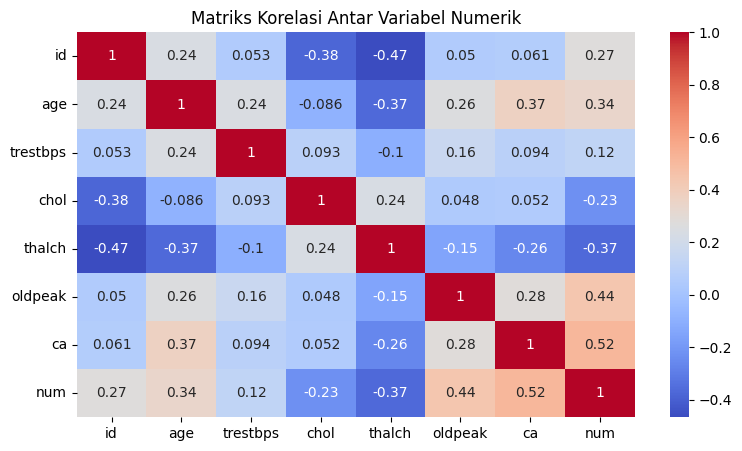

In [52]:
numeric_columns = df.select_dtypes(include='number')

correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(9, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriks Korelasi Antar Variabel Numerik')
plt.show()

# Keterangan visual korelasi
# Warna:
# Semakin merah warnanya, semakin kuat korelasi positif antara dua variabel.
# Semakin biru warnanya, semakin kuat korelasi negatif. Warna putih menunjukkan korelasi mendekati nol.

# Nilai: 
# Nilai dalam setiap sel menunjukkan koefisien korelasi antara dua variabel. Nilai berkisar antara -1 hingga 1.
# -1: Korelasi negatif sempurna (jika satu variabel naik, variabel lain turun).
# 0: Tidak ada korelasi.
# 1: Korelasi positif sempurna (jika satu variabel naik, variabel lain juga naik).


### Visualisasi data

#### Histogram

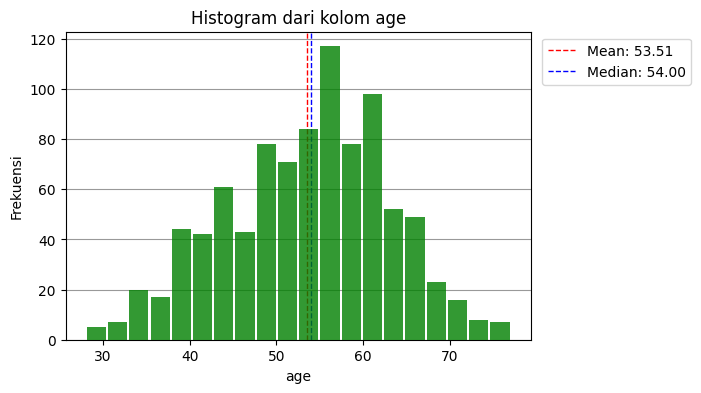

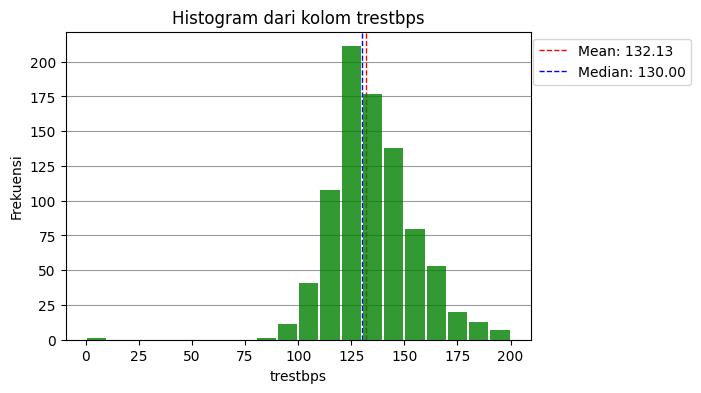

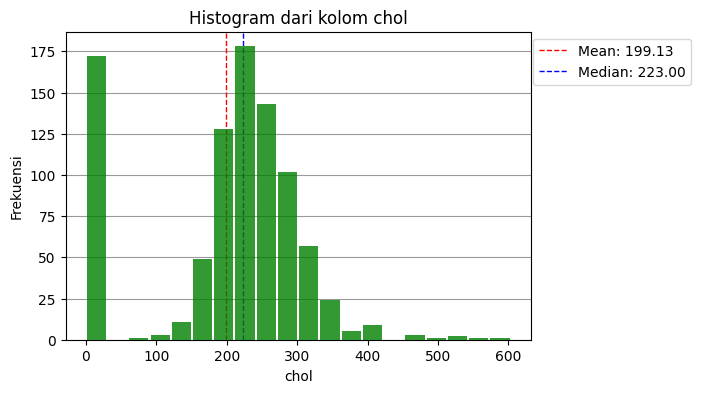

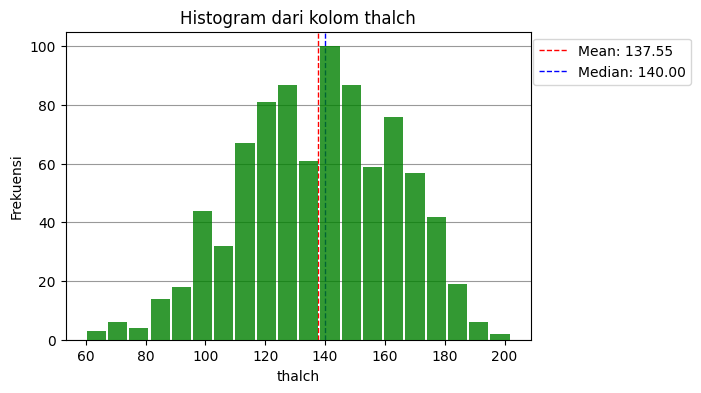

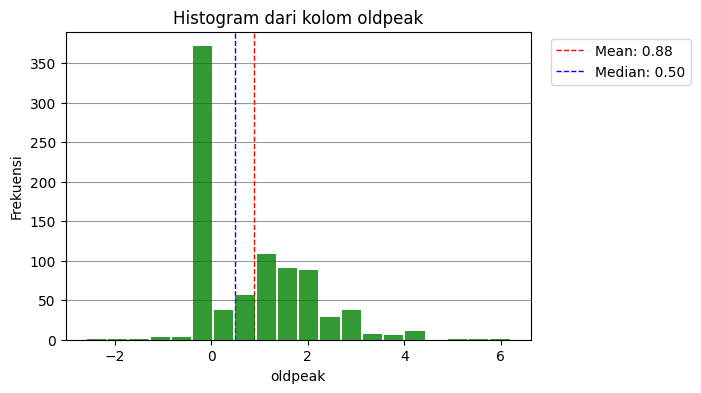

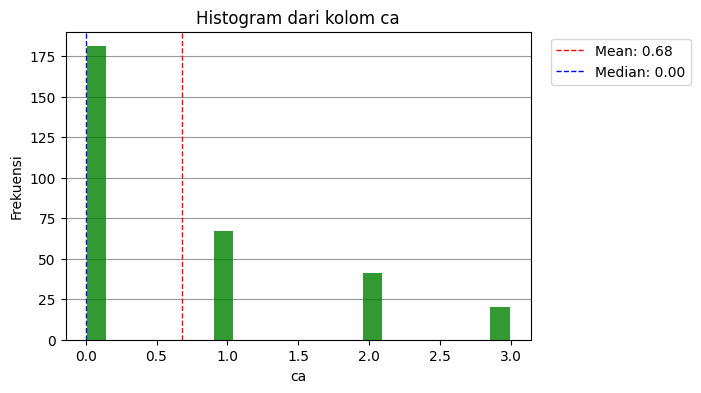

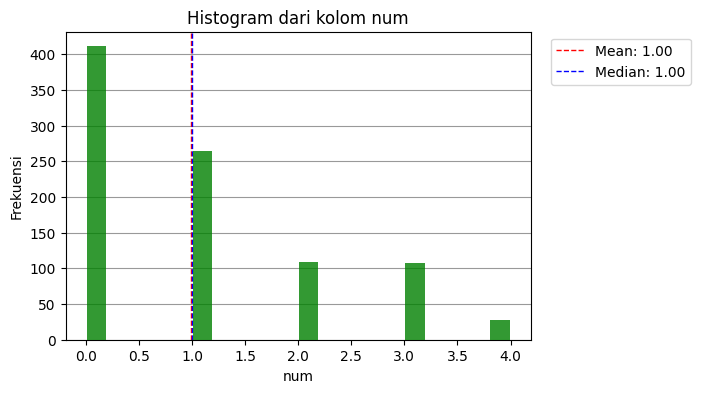

In [53]:
numeric_columns =('age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num')
 
for column in numeric_columns:

    plt.figure(figsize=(6,4))
    ax = plt.gca()

    ax.spines['top'].set_visible(True)
    ax.spines['right'].set_visible(True)
    
    plt.hist(df[column], bins=20, color='green', alpha=0.80, rwidth=0.90, zorder=3)
    
    plt.axvline(df[column].mean(), color='red', linestyle='dashed', linewidth=1, label=f'Mean: {df[column].mean():.2f}')
    plt.axvline(df[column].median(), color='blue', linestyle='dashed', linewidth=1, label=f'Median: {df[column].median():.2f}')
    
    plt.title(f'Histogram dari kolom {column}')
    plt.xlabel(column)
    plt.ylabel('Frekuensi')
    plt.legend(loc='upper right', bbox_to_anchor=(1.36, 1))
    plt.grid(axis='y',color='black', alpha=0.4, zorder=0)
    
    plt.show()

- Box plot

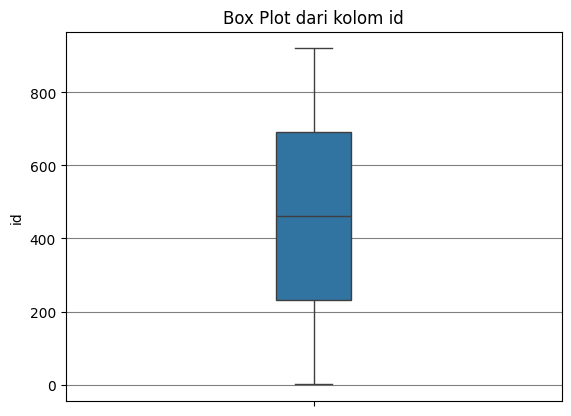

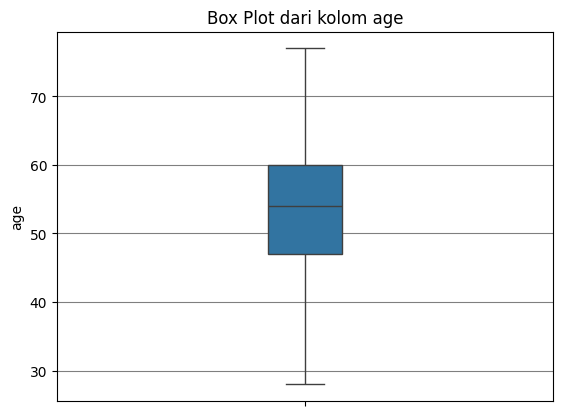

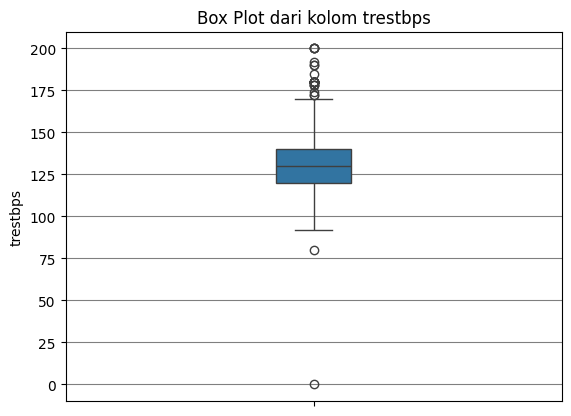

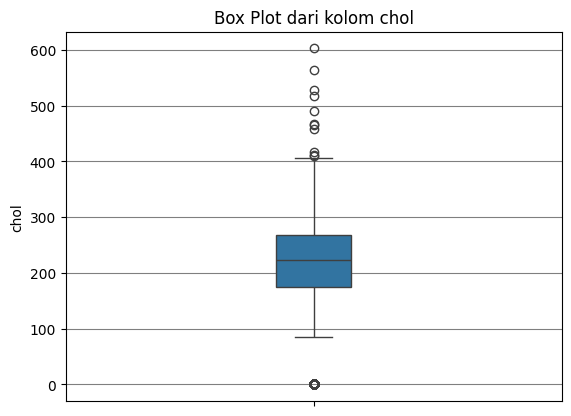

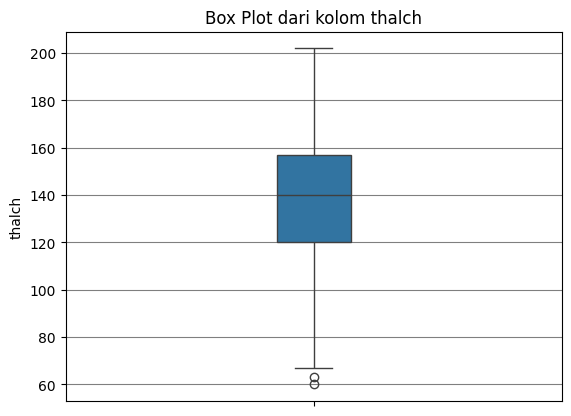

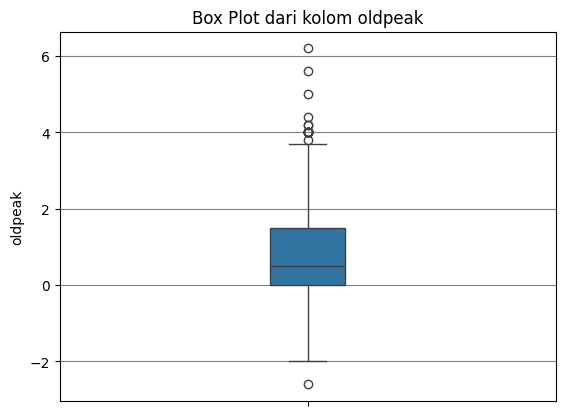

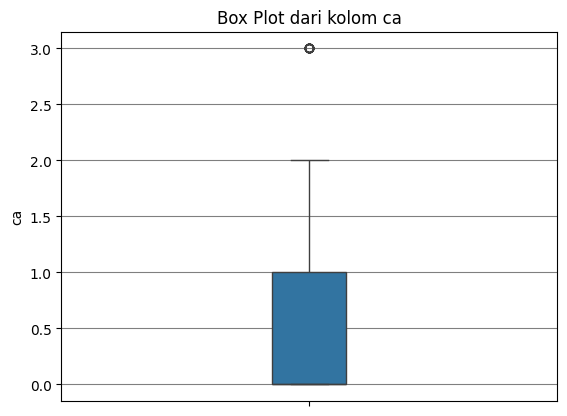

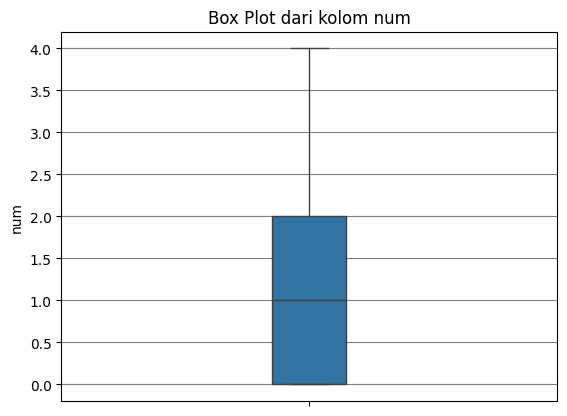

In [54]:
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

for col in numeric_cols:
  plt.figure()
  sns.boxplot(y=df[col], width=0.15)
  plt.title(f'Box Plot dari kolom {col}')
  plt.ylabel(col)
  plt.grid(axis='y',color='black', alpha=0.5, zorder=0)

  if len(col) > 10 or len(numeric_cols) > 5: 
      plt.xticks(rotation=90)

  plt.show()

In [55]:
numeric_columns = df.select_dtypes(include='number')

correlation_matrix = numeric_columns.corr()

threshold = 0.7

plot_created = False
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        col1 = correlation_matrix.columns[i]
        col2 = correlation_matrix.columns[j]
        correlation = correlation_matrix.iloc[i, j]

        if abs(correlation) > threshold:
            plt.figure()
            plt.scatter(df[col1], df[col2], alpha=1)
            plt.title(f'Scatter Plot dari kolom {col1} vs {col2} (Correlation: {correlation:.2f})')
            plt.xlabel(col1)
            plt.ylabel(col2)
            plt.grid(color='black')
            plt.show()
            plot_created = True

if not plot_created:
    print('Tidak ada pasangan variabel dengan korelasi yang cukup tinggi untuk ditampilkan')

Tidak ada pasangan variabel dengan korelasi yang cukup tinggi untuk ditampilkan


### Laporan
#### Berdasarkan eksplorasi data yang telah dilakukan ada beberapa penemuan yang signifikan:
`1. Eksplorasi awal`
- informasi dataset
-- dari dataset tersebut berisi `920 baris(rows)` dan `16 kolom(column)`
dan beberapa tipe data seperti: `float(5)`, `int64(3)`, `object(8)`
- Nilai yang hilang
-- pengecekan nilai yang hilang pada semua kolom numerik terdeteksi pada `8` dari total `16` kolom: `trestpbs(59)`, `chol(30)`, `fbs(90)`, `restecg(2)`, `thalch(55)`, `elxang(55)`, `oldpeak(62)`, `slope(309)`, `ca(611)`, `thal(486)`,
- Outlier
-- pengecekan outlier terdeteksi pada kolom: trestbps, metode yang digunakan adalah IQR

`2. Statistik deskriptif`
- Tabel statistik deskriptif memberikan ringkasan numerik dari kolom-kolom numerik dalam dataset, termasuk ukuran pemusatan `(mean, median, modus)`, ukuran penyebaran `(standar deviasi, variansi)`, serta ukuran bentuk distribusi `(skewness, kurtosis)`.
- Dari tabel tersebut, kita dapat mengidentifikasi:
-- Kolom-kolom dengan distribusi yang tidak normal, ditunjukkan oleh nilai skewness dan kurtosis yang jauh dari 0.
Kolom-kolom dengan variabilitas tinggi atau rendah, ditunjukkan oleh nilai standar deviasi dan variansi.
Perbedaan antara mean dan median, yang dapat mengindikasikan adanya skewness dalam distribusi.
- Untuk scatter plot sepertinya tidak ada pasangan variabel yang cukup tinggi, jadi kode diatas tidak menampilkan scatter plot